In [1]:
import os

import analysis_plotting_helper_functions_v3 as helper
import analysis_utils as utils

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7"]
continuous_colors = ["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#dedad2", 
                     "#e4bcad", "#df979e", "#d7658b", "#c80064"]

In [3]:
cohort = 'cohort_2_v2'
to_analyze = 'full_clean'
data_dir = '/Users/rebekahzhang/Documents/shuler_lab/behavior_data'
data_folder = os.path.join(data_dir, cohort, to_analyze)
print(data_folder)

/Users/rebekahzhang/Documents/shuler_lab/behavior_data/cohort_2_v2/full_clean


# Session based plotting

## load session log

In [4]:
training_session_log = utils.load_session_log(data_folder, 'training_sessions.csv')

make mouse list

In [5]:
mouse_list = utils.generate_mouse_list(training_session_log)

['RZ012', 'RZ013', 'RZ015', 'RZ016', 'RZ017']


plot across training days with each mouse as a line

In [6]:
def plot_each_mouse_per_line(mouse_list, data_df, column_name, plot_name, title, x_label, y_label):
    fig = plt.figure()
    for i, mouse in enumerate(mouse_list):
        session_mouse = data_df.loc[data_df.mouse == mouse]
        plt.plot(session_mouse.days, session_mouse[column_name], color=colors[i], label=mouse)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{plot_name}.png', bbox_inches='tight')

## Plot type of trials per session

Calculate proportions of trials types and generate trial type df

In [ ]:
def generate_trial_type_df(training_session_log):
    for dir_name in training_session_log.dir:
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        session_performance = helper.get_session_performance(all_trials)
        training_session_log.loc[training_session_log.dir == dir_name, 
                                 ['miss_trials', 'good_trials']] = session_performance
    trial_type_df = training_session_log[['mouse', 'days', 'num_trials', 'miss_trials', 'good_trials']].copy()
    trial_type_df['p_miss'] = trial_type_df.miss_trials/trial_type_df.num_trials
    trial_type_df['p_good'] = trial_type_df.good_trials/trial_type_df.num_trials
    trial_type_df['p_accident'] = 1 - trial_type_df.p_good - trial_type_df.p_miss 
    return trial_type_df

In [ ]:
trial_type_df = generate_trial_type_df(training_session_log)

In [ ]:
# ploting the proportion of good trials, miss trials, and enl trials per session
fig, axs = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns

# Loop through the mouse list and plot data for each mouse in a subplot
for i, mouse in enumerate(mouse_list):
    session_mouse = trial_type_df.loc[trial_type_df.mouse == mouse]
    to_plot = session_mouse.loc[:, ['days', 'p_good', 'p_miss', 'p_accident']]
    ax = axs.flat[i]
    to_plot.plot.bar(x='days', stacked=True, color=colors[0:3], ax=ax, legend=None)
    ax.set_title(mouse)
    if i == 0 or i == 3:
        ax.set_ylabel('Normalized Proportion')
    ax.plot(to_plot.days, to_plot.p_good, color='k', linewidth=1.5)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1))

plt.delaxes(axs.flat[-1])

plt.tight_layout()
plt.savefig('engagement_plots.png', bbox_inches='tight')
plt.show()

In [ ]:
# plot the proportion of good trials
plot_each_mouse_per_line(mouse_list, 
                         data_df=trial_type_df, 
                         column_name='p_good', 
                         plot_name="%_good_trials", 
                         title='Proportion of Good Trials',
                         x_label='Days in Training', 
                         y_label='Proportion')

In [ ]:
# plot the proportion of miss trials
plot_each_mouse_per_line(mouse_list, 
                         data_df=trial_type_df, 
                         column_name='p_miss', 
                         plot_name="%_miss_trials",
                         title='Proportion of Missed Trials', 
                         x_label='Days in Training', 
                         y_label='Proportion')

In [ ]:
# plot the proportion of accident trials
plot_each_mouse_per_line(mouse_list, 
                         data_df=trial_type_df, 
                         column_name='p_accident', 
                         plot_name="%_accident_trials", 
                         title='Proportion of Accident Trials',
                         x_label='Days in Training', 
                         y_label='Proportion')

## Plot rewards per session

In [12]:
training_session_log['reward_rate'] = training_session_log.rewards/training_session_log.time

In [7]:
training_session_log['reward_per_trial'] = training_session_log.rewards/training_session_log.num_trials

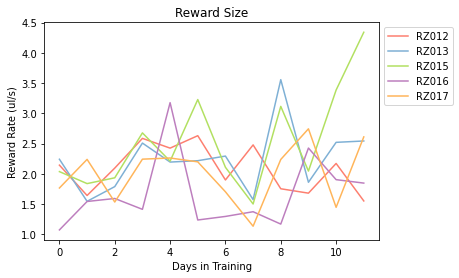

In [8]:
# plot the reward rize
plot_each_mouse_per_line(mouse_list, 
                         data_df=training_session_log, 
                         column_name='reward_per_trial', 
                         plot_name="reward_size",
                         title='Reward Size', 
                         x_label='Days in Training', 
                         y_label='Reward Rate (ul/s)')

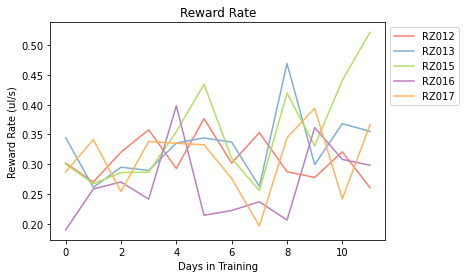

In [13]:
# plot the reward rate
plot_each_mouse_per_line(mouse_list, 
                         data_df=training_session_log, 
                         column_name='reward_rate', 
                         plot_name="reward_rate",
                         title='Reward Rate', 
                         x_label='Days in Training', 
                         y_label='Reward Rate (ul/s)')

In [ ]:
# plot the session length
plot_each_mouse_per_line(mouse_list, 
                         data_df=training_session_log, 
                         column_name='time', 
                         plot_name="session_length", 
                         title='Session Length',
                         x_label='Days in Training', 
                         y_label='Time (s)')

In [ ]:
# plot the reward rate
plot_each_mouse_per_line(mouse_list, 
                         data_df=training_session_log, 
                         column_name='num_trials', 
                         plot_name="num_trials", 
                         title='Trials Completed',
                         x_label='Days in Training', 
                         y_label='Count')

## Plot time wait behavior

In [9]:
def generate_wait_df(training_session_log):
    wait_df = training_session_log[['mouse', 'days', 'dir']].copy()

    for dir_name in training_session_log.dir:
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        # time waited for all trials
        session_tw = helper.get_session_tw(all_trials)
        wait_df.loc[wait_df.dir == dir_name, 
                                ['tw_mean', 'tw_median', 'tw_stdev']] = session_tw
        # time waited for long and short blocks
        block_tw = helper.get_block_tw(all_trials)
        wait_df.loc[wait_df.dir == dir_name, 
                                ['tw_l_mean', 'tw_l_median', 'tw_l_stdev',
                                'tw_s_mean', 'tw_s_median','tw_s_stdev']] = block_tw

        good_trials = utils.select_good_trials(all_trials)
         # time waited for good trials
        session_tw_g = helper.get_session_tw(good_trials)
        wait_df.loc[wait_df.dir == dir_name, 
                                ['tw_mean_g', 'tw_median_g', 'tw_stdev_g']] = session_tw_g
        block_tw_g = helper.get_block_tw(good_trials)
        wait_df.loc[wait_df.dir == dir_name, 
                                ['tw_l_mean_g', 'tw_l_median_g', 'tw_l_stdev_g',
                                'tw_s_mean_g', 'tw_s_median_g','tw_s_stdev_g']] = block_tw_g

    wait_df['tw_diff'] = wait_df['tw_l_mean'] - wait_df['tw_s_mean']
    wait_df['tw_diff_g'] = wait_df['tw_l_mean_g'] - wait_df['tw_s_mean_g']
    return wait_df

In [10]:
wait_df = generate_wait_df(training_session_log)

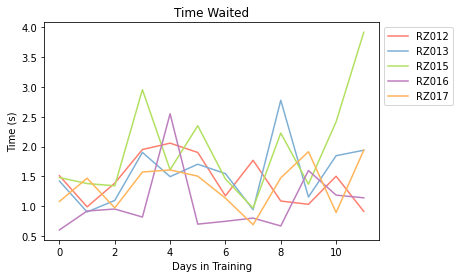

In [11]:
# plot the time waited over days. 
plot_each_mouse_per_line(mouse_list, 
                         data_df=wait_df, 
                         column_name='tw_mean', 
                         plot_name="tw_mean", 
                         title='Time Waited',
                         x_label='Days in Training', 
                         y_label='Time (s)')

In [ ]:
# plot the time waited over days good trials only. 
plot_each_mouse_per_line(mouse_list, 
                         data_df=wait_df, 
                         column_name='tw_mean_g', 
                         plot_name="tw_mean_g", 
                         title='Time Waited (Good Trials Only)',
                         x_label='Days in Training', 
                         y_label='Time (s)')

In [ ]:
# plot the difference in time waited bewteen long and short blocks over days. 
plot_each_mouse_per_line(mouse_list, 
                         data_df=wait_df, 
                         column_name='tw_diff', 
                         plot_name="tw_diff", 
                         title='Difference in Time Waited',
                         x_label='Days in Training', 
                         y_label='Time (s)')

In [ ]:
# plot the difference in time waited bewteen long and short blocks over days. good trials only
plot_each_mouse_per_line(mouse_list, 
                         data_df=wait_df, 
                         column_name='tw_diff_g', 
                         plot_name="tw_diff_g", 
                         title='Difference in Time Waited (Good Trials Only)',
                         x_label='Days in Training', 
                         y_label='Time (s)')

In [ ]:
def generate_linear_fit_df(training_session_log):
    linear_fit_df = training_session_log[['mouse', 'days', 'dir']].copy()
    for dir_name in training_session_log.dir:
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        all_trials = all_trials[all_trials['time_waited'].notna()]
        fit_data = utils.linear_fit(all_trials, 'bg_length', 'time_waited')
        linear_fit_df.loc[linear_fit_df.dir == dir_name, 
                                ['slope', 'intercept', 'rsquared']] = fit_data
    return linear_fit_df


In [ ]:
linear_fit_df = generate_linear_fit_df(training_session_log)

In [ ]:
# plot the difference in time waited bewteen long and short blocks over days. good trials only
plot_each_mouse_per_line(mouse_list, 
                         data_df=linear_fit_df, 
                         column_name='slope', 
                         plot_name="tb_tw_correlation", 
                         title='Correlation between Background Length and Time Waited',
                         x_label='Days in Training', 
                         y_label=' ')

In [ ]:
fig = plt.figure()
sns.pointplot(x="days", 
              y="slope", 
              errorbar='sd', 
              data=linear_fit_df)
fig.savefig('tb_tw_correlation_all_mice.png', bbox_inches='tight')

In [ ]:
fig = plt.figure()
sns.pointplot(x="days", 
              y="rsquared", 
              errorbar='sd', 
              data=linear_fit_df)
fig.savefig('tb_tw_rsquared_all_mice.png', bbox_inches='tight')

In [ ]:
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = linear_fit_df.loc[linear_fit_df.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.rsquared, color=colors[i], 
             label=mouse)

plt.xlabel('Days in Training')
# plt.ylabel('Time (s)')
plt.title('R Squared of Correlation between Background Length and Time Waited')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
# plt.xlim([0, 11])
# plt.ylim([0, 0.4])
fig.savefig('tb_tw_correlation_rsuqared.png', bbox_inches='tight')

In [ ]:
# Create a figure with six subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns

# Loop through the mouse list and plot data for each mouse in a subplot
for i, mouse in enumerate(mouse_list):
    session_mouse = wait_df_copy.loc[wait_df_copy.mouse == mouse]
    ax = axs.flat[i]
    ax.errorbar(session_mouse.days, session_mouse.tw_mean, session_mouse.tw_stdev, 
                linestyle='None', marker='o', color=colors[0], label='mean')
    ax.scatter(session_mouse.days, session_mouse.tw_median, color=colors[1], 
               label='median')
    ax.set_title(mouse)
    ax.set_xlabel('Days in Training')
    ax.set_ylabel('Time Waited (s)')

# Extract the legend from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Set the figure legend outside the loop
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1))

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig('tw_plots.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

In [ ]:
# plot percent mean time waited in session. each mouse is a line.
fig = plt.figure()
for i, mouse in enumerate(mouse_list):
    session_mouse = wait_df_copy.loc[wait_df_copy.mouse == mouse]
    plt.plot(session_mouse.days, session_mouse.tw_mean, color=colors[i], label=mouse)

plt.xlabel('Days in Training')
plt.ylabel('Mean Time Waited (s)')
plt.legend(loc='upper right')
plt.savefig(f'tw_all_mice', bbox_inches='tight')

In [ ]:
for dir_name in training_session_log.dir:
    all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
    good_trials = utils.select_good_trials(all_trials)
    session_time_waited = helper.get_session_time_waited(good_trials)
    wait_df_copy.loc[wait_df_copy.dir == dir_name, 
                     ['tw_good_mean', 'tw_good_median', 'tw_good_stdev']] = session_time_waited

In [ ]:
# Create a figure with six subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns

# Loop through the mouse list and plot data for each mouse in a subplot
for i, mouse in enumerate(mouse_list):
    session_mouse = wait_df_copy.loc[wait_df_copy.mouse == mouse]
    ax = axs.flat[i]
    ax.errorbar(session_mouse.days, session_mouse.tw_good_mean, session_mouse.tw_good_stdev, 
                linestyle='None', marker='o', color=colors[0], label='mean')
    ax.scatter(session_mouse.days, session_mouse.tw_good_median, color=colors[1], 
               label='median')
    ax.set_title(mouse)
    ax.set_xlabel('Days in Training')
    ax.set_ylabel('Time Waited (s)')

# Extract the legend from the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()

# Set the figure legend outside the loop
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.09, 1))

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig('tw_good_plots.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

In [ ]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, day) in enumerate(zip(session_mouse.dir, session_mouse.days)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        custom_palette = {'l': colors[1], 's': colors[0]}
        
        sns.scatterplot(x="session_trial_num",
                        y="time_waited",
                        hue="blk_type",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Day {day}')
        ax.set_ylim([0, 10])

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'trial_num_vs_tw_{mouse}.png', bbox_inches='tight', dpi=300)

In [ ]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, day) in enumerate(zip(session_mouse.dir, session_mouse.days)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        custom_palette = {0: continuous_colors[0], 1: continuous_colors[1], 
                          2: continuous_colors[2], 3: continuous_colors[3],
                          4: continuous_colors[4], 5: continuous_colors[5], 
                          6: continuous_colors[6], 7: continuous_colors[7]}
        
        sns.scatterplot(x="bg_length",
                        y="time_waited",
                        hue="block_num",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Day {day}')
        ax.set_xlim([0, 4])
        handles, labels = ax.get_legend_handles_labels()
    
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'bg_vs_tw_blk_{mouse}.png', bbox_inches='tight', dpi=300)


In [ ]:
for mouse in mouse_list:
    session_mouse = training_session_log.loc[training_session_log.mouse == mouse]
    days_trained = len(session_mouse)

    # Calculate the number of rows and columns for the subplot grid
    num_rows = (days_trained - 1) // 5 + 1
    num_cols = min(days_trained, 5)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2.5 * num_rows))

    for i, (dir_name, day) in enumerate(zip(session_mouse.dir, session_mouse.days)):
        all_trials = utils.load_all_trials_analyzed(data_folder, dir_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        custom_palette = {'l': colors[0], 's': colors[1]}
        
        sns.pointplot(x="block_num",
                        y="time_waited",
                        errorbar='sd',
                        hue="blk_type",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_title(f'Day {day}')

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1))
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')
    
    for i in range(days_trained):
        ax = axs.flat[i]
        ax.get_legend().remove()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'trial_num_vs_tw_pointplot_{mouse}.png', bbox_inches='tight', dpi=300)

# Block based plotting

In [ ]:
def load_all_blocks(data_folder, dir_name):
    filename = f'{dir_name}_all_blocks.csv'
    path = os.path.join(data_folder, dir_name, filename)
    all_blocks_df = pd.read_csv(path)
    return all_blocks_df

In [ ]:
def get_session_performance(all_trials):
    num_miss_trials = all_trials.miss_trial.sum()
    good_trials = all_trials.loc[(all_trials['miss_trial'] == False) & (all_trials['enl_repeats'] == 1)]
    num_good_trials = len(good_trials)
    return [num_miss_trials, num_good_trials]

In [ ]:
block = load_all_blocks(data_folder, training_session_log.dir[57])